# Goal: Figure out why it's not working to compute differences of dataframes using the method in my `averted` function

In [1]:
import pandas as pd, numpy as np
import vivarium_output_loader as vol
import lsff_output_processing as lop

!whoami
!date

ndbs
Fri Oct  2 18:51:41 PDT 2020


In [2]:
%load_ext autoreload
%autoreload 2

## 1. Define output directories and load count space data

In [3]:
base_directory = '/share/costeffectiveness/results/vivarium_conic_lsff'
locations_rundates = {
    'India': '2020_06_26_20_35_00',
    'Nigeria': '2020_06_26_20_28_27',
    'Ethiopia': '2020_06_28_12_40_56',
}
locations_paths = vol.locaction_paths_from_rundates(base_directory, locations_rundates)

# Load a separate dictionary for each country
data = vol.load_count_data_by_location(locations_paths)
data.keys()

dict_keys(['India', 'Nigeria', 'Ethiopia'])

In [4]:
# View the table names for one of the countries (they should be the same for all)
data['India'].keys()

dict_keys(['gestational_age', 'transition_count', 'hemoglobin_level', 'deaths', 'state_person_time', 'anemia_state_person_time', 'births_with_ntd', 'population', 'person_time', 'ylls', 'ylds', 'births', 'birth_weight'])

In [7]:
# View the yll table
data['India']['ylls'].head()

,year,age_group,cause,folic_acid_fortification_group,vitamin_a_fortification_group,measure,input_draw,scenario,value
0,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,baseline,0.0
1,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,folic_acid_fortification_scale_up,0.0
2,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,iron_folic_acid_fortification_scale_up,0.0
3,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,vitamin_a_fortification_scale_up,0.0
4,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,29,baseline,0.0


In [5]:
# Merge the data for all locations into a single dictionary of dataframes
all_data = vol.merge_location_count_data(data)
all_data.keys()

dict_keys(['gestational_age', 'transition_count', 'hemoglobin_level', 'deaths', 'state_person_time', 'anemia_state_person_time', 'births_with_ntd', 'population', 'person_time', 'ylls', 'ylds', 'births', 'birth_weight'])

In [6]:
# Compare yll table with the one above
all_data['ylls'].head()

,location,year,age_group,cause,folic_acid_fortification_group,vitamin_a_fortification_group,measure,input_draw,scenario,value
0,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,baseline,0.0
1,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,folic_acid_fortification_scale_up,0.0
2,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,iron_folic_acid_fortification_scale_up,0.0
3,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,vitamin_a_fortification_scale_up,0.0
4,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,29,baseline,0.0


## 2. Check iron effect on birthweight

In [8]:
all_data['births'].head()

,location,year,sex,folic_acid_fortification_group,measure,input_draw,scenario,value
0,India,2020,female,covered,live_births,21,baseline,1857.0
1,India,2020,female,covered,live_births,21,baseline,12.0
2,India,2020,female,covered,live_births,21,baseline,530.0
3,India,2020,female,covered,live_births,21,folic_acid_fortification_scale_up,1857.0
4,India,2020,female,covered,live_births,21,folic_acid_fortification_scale_up,12.0


In [9]:
all_data['births'].folic_acid_fortification_group.unique()

array(['covered', 'uncovered', 'unknown'], dtype=object)

In [10]:
all_data['birth_weight'].head()

,location,year,sex,measure,input_draw,scenario,value,iron_fortification_group
0,India,2020,female,birth_weight_mean,21,baseline,2912.186341,uncovered
1,India,2020,female,birth_weight_mean,21,baseline,2897.547480,covered
2,India,2020,female,birth_weight_mean,21,folic_acid_fortification_scale_up,2912.186341,uncovered
3,India,2020,female,birth_weight_mean,21,folic_acid_fortification_scale_up,2897.547480,covered
4,India,2020,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,2912.186341,uncovered


In [11]:
all_data['birth_weight'].iron_fortification_group.unique()

array(['uncovered', 'covered'], dtype=object)

In [12]:
all_data['birth_weight'].scenario.unique()

array(['baseline', 'folic_acid_fortification_scale_up',
       'iron_folic_acid_fortification_scale_up',
       'vitamin_a_fortification_scale_up'], dtype=object)

In [13]:
all_data['birth_weight'].measure.unique()

array(['birth_weight_mean', 'birth_weight_sd'], dtype=object)

In [14]:
year = '2022'
scenario = 'iron_folic_acid_fortification_scale_up'
location = 'Nigeria'
draw = 21
query = ('measure=="birth_weight_mean" and scenario==@scenario and year==@year'
         ' and input_draw==@draw and location==@location'
        )
all_data['birth_weight'].query(query)

,location,year,sex,measure,input_draw,scenario,value,iron_fortification_group
1604,Nigeria,2022,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3193.635062,uncovered
1605,Nigeria,2022,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3201.502874,covered
2004,Nigeria,2022,male,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3235.496806,uncovered
2005,Nigeria,2022,male,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3241.154803,covered


In [67]:
bw_mean = data['Nigeria']['birth_weight']#.query('measure=="birth_weight_mean"')
bw_mean.head()
bw_diff = lop.averted(bw_mean, 'uncovered', 'iron_fortification_group')
bw_diff.head()

['year', 'sex', 'measure', 'input_draw', 'scenario']
baseline index: ['year', 'sex', 'measure', 'input_draw', 'scenario']
intervention index: ['year', 'sex', 'measure', 'input_draw', 'scenario', 'iron_fortification_group']
averted index: ['year', 'sex', 'measure', 'input_draw', 'scenario', 'iron_fortification_group']
Index(['year', 'sex', 'measure', 'input_draw', 'scenario',
       'iron_fortification_group', 'value'],
      dtype='object')


,year,sex,measure,input_draw,scenario,iron_fortification_group,relative_to,value
0,2020,female,birth_weight_mean,21,baseline,covered,uncovered,8.396967
1,2020,female,birth_weight_mean,21,folic_acid_fortification_scale_up,covered,uncovered,8.396967
2,2020,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,covered,uncovered,8.396967
3,2020,female,birth_weight_mean,21,vitamin_a_fortification_scale_up,covered,uncovered,8.396967
4,2020,female,birth_weight_mean,29,baseline,covered,uncovered,10.233676


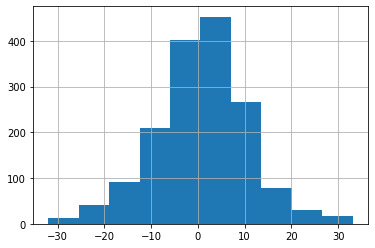

In [68]:
bw_diff.value.hist()

In [69]:
bw_diff.value.mean()

0.8050827922367014

In [70]:
bw_mean = data['Nigeria']['birth_weight'].query('measure=="birth_weight_mean"')
# index_columns = ['year', 'sex', 'measure', 'input_draw', 'scenario']
# bw_mean = bw_mean.groupby(index_columns).sum().reset_index()
# bw_mean = bw_mean.query('scenario in ["baseline", "iron_folic_acid_fortification_scale_up"]')
bw_mean.head()
bw_diff = lop.averted(bw_mean, 'baseline')
bw_diff.head()

['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group']
baseline index: ['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group']
intervention index: ['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group', 'scenario']
averted index: ['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group', 'scenario']
Index(['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group',
       'scenario', 'value'],
      dtype='object')


,year,sex,measure,input_draw,iron_fortification_group,scenario,relative_to,value
0,2020,female,birth_weight_mean,21,covered,folic_acid_fortification_scale_up,baseline,0.000000e+00
1,2020,female,birth_weight_mean,21,covered,iron_folic_acid_fortification_scale_up,baseline,4.547474e-13
2,2020,female,birth_weight_mean,21,covered,vitamin_a_fortification_scale_up,baseline,-4.547474e-13
3,2020,female,birth_weight_mean,21,uncovered,folic_acid_fortification_scale_up,baseline,0.000000e+00
4,2020,female,birth_weight_mean,21,uncovered,iron_folic_acid_fortification_scale_up,baseline,9.094947e-13


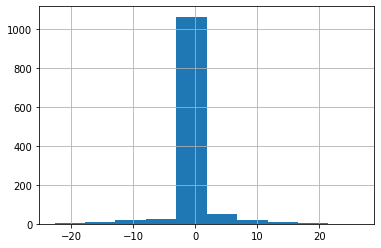

In [71]:
bw_diff.value.hist()

In [72]:
bw_diff.value.mean()

0.003013569771916309

In [24]:
bw_mean.scenario.unique()

array(['baseline', 'folic_acid_fortification_scale_up',
       'iron_folic_acid_fortification_scale_up',
       'vitamin_a_fortification_scale_up'], dtype=object)

In [ ]:
bw_mean.query('iron_fortification_group')

In [68]:
bw_diff.query('scenario=="iron_folic_acid_fortification_scale_up"').head()

,year,sex,measure,input_draw,scenario,relative_to,value
1,2020,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,baseline,9.094947e-13
4,2020,female,birth_weight_mean,29,iron_folic_acid_fortification_scale_up,baseline,0.000000e+00
7,2020,female,birth_weight_mean,55,iron_folic_acid_fortification_scale_up,baseline,1.818989e-12
10,2020,female,birth_weight_mean,78,iron_folic_acid_fortification_scale_up,baseline,9.094947e-13
13,2020,female,birth_weight_mean,155,iron_folic_acid_fortification_scale_up,baseline,-9.094947e-13


In [25]:
def calculate_bw_effect_size(birthweight_df, scenario):
    
#     covered_mean = birthweight_df.query('iron_fortification_group=="covered"')
#     uncovered_mean = birthweight_df.query('iron_fortification_group=="uncovered"')
    splitting_column = 'iron_fortification_group'
    largest_value = 'covered'
    birthweight_df = birthweight_df.query('measure=="birth_weight_mean"')
    covered_mean = birthweight_df[birthweight_df[splitting_column] == largest_value]
    uncovered_mean = birthweight_df[birthweight_df[splitting_column] != largest_value]
    
    index_columns = sorted(set(covered_mean.columns) - set([splitting_column, 'value']),
                           key=covered_mean.columns.get_loc)
    print(index_columns)
    
    covered_mean = covered_mean.set_index(index_columns)
    uncovered_mean = uncovered_mean.set_index(index_columns + [splitting_column])
    
    effect_size = covered_mean['value'] - uncovered_mean['value']
    
    return covered_mean, uncovered_mean, effect_size

c,u,e = calculate_bw_effect_size(all_data['birth_weight'].query('measure=="birth_weight_mean"'), scenario)

['location', 'year', 'sex', 'measure', 'input_draw', 'scenario']


In [26]:
c.head()

value  \
location year sex    measure           input_draw scenario                                              
India    2020 female birth_weight_mean 21         baseline                                2897.547480   
                                                  folic_acid_fortification_scale_up       2897.547480   
                                                  iron_folic_acid_fortification_scale_up  2897.547480   
                                                  vitamin_a_fortification_scale_up        2897.547480   
                                       29         baseline                                2922.724278   

                                                                                         iron_fortification_group  
location year sex    measure           input_draw scenario                                                         
India    2020 female birth_weight_mean 21         baseline                                                covered  
                                                  folic_acid_fortification_scale_up                       covered  
                                                  iron_folic_acid_fortification_scale_up                  covered  
                                                  vitamin_a_fortification_scale_up                        covered  
                                       29         baseline                                                covered

In [27]:
u.head()

value
location year sex    measure           input_draw scenario                               iron_fortification_group             
India    2020 female birth_weight_mean 21         baseline                               uncovered                 2912.186341
                                                  folic_acid_fortification_scale_up      uncovered                 2912.186341
                                                  iron_folic_acid_fortification_scale_up uncovered                 2912.186341
                                                  vitamin_a_fortification_scale_up       uncovered                 2912.186341
                                       29         baseline                               uncovered                 2903.992955

In [28]:
e.head()

location  year  sex     measure            input_draw  scenario                              
India     2020  female  birth_weight_mean  21          baseline                                 -14.638860
                                                       folic_acid_fortification_scale_up        -14.638860
                                                       iron_folic_acid_fortification_scale_up   -14.638860
                                                       vitamin_a_fortification_scale_up         -14.638860
                                           29          baseline                                  18.731323
Name: value, dtype: float64

In [29]:
c.shape

(2400, 2)

In [30]:
u.shape

(2400, 1)

In [31]:
e.shape

(2400,)

In [33]:
bw_mean.input_draw.nunique()

25

In [35]:
3*4*2*1*25*4

2400

In [46]:
bw_mean = all_data['birth_weight'].query('measure=="birth_weight_mean"')
bw_mean.iron_fortification_group.unique()

array(['uncovered', 'covered'], dtype=object)

In [27]:
bw_diff.shape

(4800, 9)

## I think I found the problem - Series and DataFrames have different behavior...

In [48]:
df1 = pd.DataFrame({'a':[1,2,1,2], 'b':[3,3,4,4], 'c':[5,5,5,5], 'd':[2,3,56,4]})
df2 = df1.assign(c=[6,6,6,6], d=[1,2,3,4])
df3 = pd.concat([df1, df2])
df3

,a,b,c,d
0,1,3,5,2
1,2,3,5,3
2,1,4,5,56
3,2,4,5,4
0,1,3,6,1
1,2,3,6,2
2,1,4,6,3
3,2,4,6,4


In [49]:
df1

,a,b,c,d
0,1,3,5,2
1,2,3,5,3
2,1,4,5,56
3,2,4,5,4


In [50]:
df1.set_index(['a','b']) + df3.set_index(['a','b','c']).query('c==6')

,,,c,d
a,b,c,,
1,3,6,NaN,3
2,3,6,NaN,5
1,4,6,NaN,59
2,4,6,NaN,8


In [73]:
def add_as_series(df1, df2):
    return df1.set_index(['a','b'])['d'] + df2.set_index(['a','b','c'])['d']

def add_as_dataframes(df1, df2):
    return df1.set_index(['a','b'])[['d']] + df2.set_index(['a','b','c'])[['d']]

In [74]:
# The c column is missing from the index.
# This was the surprising behavior in my `averted` function.
# Is this the intended behavior, or is it a bug in pandas?
add_as_series(df1, df2)

a  b
1  3     3
2  3     5
1  4    59
2  4     8
Name: d, dtype: int64

In [53]:
# Now the c column *is* included in the index because it was needed for broadcasting
add_as_series(df1, df3)

a  b  c
1  3  5      4
      6      3
   4  5    112
      6     59
2  3  5      6
      6      5
   4  5      8
      6      8
Name: d, dtype: int64

In [52]:
# When adding as dataframes, the c column is included in the index,
# even when the column only contains one value and hence broadcasting isn't necessary.
# This is the behavior I expected in my `averted` function.
add_as_dataframes(df1, df2)

,,,d
a,b,c,
1,3,6,3
2,3,6,5
1,4,6,59
2,4,6,8


In [54]:
add_as_dataframes(df1, df3)

d
a b c     
1 3 5    4
    6    3
  4 5  112
    6   59
2 3 5    6
    6    5
  4 5    8
    6    8

In [57]:
# This results in a dataframe even though there's only one column
df3.set_index(['a','b','c'])

,,,d
a,b,c,
1,3,5,2
2,3,5,3
1,4,5,56
2,4,5,4
1,3,6,1
2,3,6,2
1,4,6,3
2,4,6,4


In [63]:
def add_as_series_simple_index(df1, df2):
    return df1.set_index(['a'])['d'] + df2.set_index(['a','b'])['d']

def add_as_dataframes_simple_index(df1, df2):
    return df1.set_index(['a'])[['d']] + df2.set_index(['a','b'])[['d']]

In [60]:
# Weird, now the 'b' column is included, even though this should be analogous to the
# situation above where the 'c' column was excluded from the Series.
add_as_series_simple_index(df1.query('b==3'), df2.query('b==3'))

a  b
1  3    3
2  3    5
Name: d, dtype: int64

In [61]:
add_as_series_simple_index(df1.query('b==3'), df2)

a  b
1  3    3
2  3    5
1  4    5
2  4    7
Name: d, dtype: int64

In [64]:
add_as_dataframes_simple_index(df1.query('b==3'), df2.query('b==3'))

,,d
a,b,
1,3,3
2,3,5


In [65]:
add_as_dataframes_simple_index(df1.query('b==3'), df2)

,,d
a,b,
1,3,3
2,3,5
1,4,5
2,4,7
